# LeetCode 1615. Maximal Network Rank

## Background
LeetCode has a [curated library of 45 graph problems](https://leetcode.com/studyplan/graph-theory/) that cover eight graph topics including `graph theory`, `Dijkstra's (pathfinding)`, and `traversals` among others.

## Problem
In this notebook we will analyze [1615. Maximal Network Rank](https://leetcode.com/problems/maximal-network-rank/description/?envType=study-plan-v2&envId=graph-theory).

 This problem is classified by LeetCode as:
* Topic: Graph Theory
* Difficulty: Medium
* Tags: Graph (though it could include Node Degree, Directed Graphs, and DAGs)

In addition to developing solution code, we will use Google Gemini to help us understand the problem and go beyond the code.



## Instantiate Gemini using the Gemini API

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# !pip install python-dotenv --upgrade --quiet
from dotenv import load_dotenv
import os

# !pip install tqdm --upgrade --quiet
import tqdm as notebook_tqdm

# !pip install -U -q google.generativeai
import google.generativeai as genai

In [5]:
# read API key from local .env 
load_dotenv()
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = os.getenv('GOOGLE_API_KEY')

In [6]:
# # instantiate the LLM
genai.configure(api_key=os.environ["GOOGLE_API_KEY"])
model = genai.GenerativeModel('gemini-1.5-pro-latest')


In [7]:
# to print markdown code
from IPython.display import display, Markdown

def print_md(string):
    display(Markdown(string))

In [8]:
# test model with a simple prompt
test_prompt = '''
You are an expert in graph theory. I am a data scientist.
Provide a simple, concise explanation of what graph theory is
and why it is important to a data scientist. Focus on practical
applications.
'''

test_response = model.generate_content(test_prompt)
print_md(test_response.text)

Think of graph theory as the mathematics of connections. It studies objects (called **nodes** or vertices) and their relationships (represented by **edges**).  

**Why is this important for you, a data scientist?**

* **Understanding Relationships:** Graph theory lets you model relationships within your data.  For example, in a social network, nodes could be users and edges could represent friendships.  This allows you to analyze network structure, identify influencers, and predict user behavior.
* **Finding Patterns:**  Graphs are fantastic for uncovering patterns.  Think about recommendation systems – items and users are nodes, and "likes" are edges. This structure helps find similar users or suggest products based on shared preferences. 
* **Optimization:** Need to find the shortest route for deliveries? Or the most efficient flow in a network?  Graph algorithms like Dijkstra's and Ford-Fulkerson are your tools.

**Practical Applications for Data Scientists:**

* **Social Network Analysis:**  Community detection, influence prediction, link prediction
* **Recommendation Systems:** Collaborative filtering, personalized suggestions
* **Fraud Detection:** Identifying suspicious connections and patterns
* **Natural Language Processing:**  Building knowledge graphs, understanding semantic relationships
* **Biological Networks:** Analyzing protein interactions, gene regulatory networks

In short, graph theory gives you a powerful framework to represent and analyze connected data, leading to valuable insights and solutions in various data science domains. 


## LeetCode Problem Overview
First we will ask Gemini to provide an overview of the problem with a focus on identifying and explaining the graph theory concepts involved.

In [11]:
# instantiate Gemini for multi-turn chat with an empty history
chat = model.start_chat(history=[])

In [12]:
lc_problem = '1615. Maximal Network Rank'

In [13]:
problem_prompt = f'''
You are a helpful assistant who is an expert in graph theory, graph algorithms and
LeetCode problems. I want you to help me understand a LeetCode graph problem from
a graph theory perspective. Let's take this step-by-step.

First, provide an overview of Leetcode {lc_problem}.

Next, classify the graph domain of this problem (e.g., social network analysis,
recommendation system, pathfinding, or others -- you are not limited to these
choices) and provide an explanation of why it is categorized in this way.

Finally, identify and describe each graph theory concept involved in the problem and solution.
For each graph theory concept, give a detailed explanation of that concept and how
it relates to this problem. Also describe the practical applications of these graph theory
concepts.

Do not provide a solution to the problem at this time. We will do that later.
'''

problem_response = chat.send_message(problem_prompt)

print_md(problem_response.text)

# print(problem_prompt)

## LeetCode 1615. Maximal Network Rank: A Graph Theory Perspective

**Problem Overview:**

LeetCode 1615. Maximal Network Rank asks you to find the maximal network rank of a network represented by an undirected graph. The network rank of two different cities is defined as the total number of directly connected roads to either city. The problem gives you the number of cities (n) and an array of roads represented as pairs of connected cities (roads). Your task is to find the maximal network rank among all possible pairs of cities in the network. 

**Graph Domain Classification:**

This problem falls under the domain of **infrastructure network analysis**.  

**Explanation:**

The cities and roads in the problem can be seen as a representation of a real-world infrastructure network, such as a transportation network (e.g., roads, railways) or a communication network (e.g., internet, telephone lines).  We are essentially analyzing the connectivity of this network to find the pair of cities with the highest combined number of connections, which represents a critical point for network robustness and potential bottlenecks.

**Graph Theory Concepts Involved:**

1. **Undirected Graph:** The problem specifies an undirected graph, meaning the connections (roads) between cities work in both directions.  This is a fundamental concept in graph theory, distinguishing it from directed graphs where connections have specific directionality.

   * **Detailed Explanation:**  An undirected graph G consists of a set of vertices (V) representing the cities and a set of edges (E) representing the roads. Each edge connects two vertices, and the order of the vertices in the edge doesn't matter. 
   * **Practical Applications:** Undirected graphs are used to model various relationships where direction doesn't matter, such as friendships in a social network, connections in a power grid, or molecules in a chemical compound.

2. **Degree of a Vertex:** The degree of a vertex in an undirected graph is the number of edges connected to that vertex. In this problem, the degree of a city represents the number of roads directly connected to it.

   * **Detailed Explanation:** The degree of a vertex v in graph G is the number of edges incident to v. In simple graphs, a loop contributes 2 to the degree of the vertex.
   * **Practical Applications:** Degree is a fundamental measure of centrality in a network, often used in social network analysis to identify influential individuals or in web page ranking algorithms to identify important pages.

3. **Network Rank:** This problem introduces the concept of "network rank," which is defined as the sum of the degrees of two distinct vertices. It essentially measures the combined connectivity of two cities within the network.

   * **Detailed Explanation:** Network rank, specific to this problem, is a custom metric derived from the degree of vertices. It quantifies the overall connectivity involving two specific nodes in the network.
   * **Practical Applications:** While not a standard graph theory concept, the idea of combined connectivity is relevant in network resilience analysis. Identifying nodes with high network rank can highlight potential points of failure or bottlenecks in the network. 

By understanding these graph theory concepts and their application within the context of infrastructure network analysis, we can build a solid foundation for approaching the LeetCode 1615 problem and developing an efficient solution. 


## Data Set

In [ ]:
data_prompt = '''
Now I want you to generate an accurate data set that
I can use to understand and practice solving this LeetCode problem.

Return the data and variables that I will need along with
and explanation of both, in the context of the problem.

Include the accurate solution for the generated data set as well.
The data set must guaranteed that a unique solution exists.

For example, the following data and explanation is included with the
original LeetCode problem:

"Input: n = 6, edges = [[0,1],[0,2],[2,5],[3,4],[4,2]]
Output: [0,3]
Explanation: It's not possible to reach all the nodes from a single vertex.
From 0 we can reach [0,1,2,5]. From 3 we can reach [3,4,2,5]. So we output [0,3]."

'''

data_response = chat.send_message(data_prompt)

print_md(data_response.text)

## Data Set and Explanation

**Input:**

* `n = 7` (Number of nodes in the graph)
* `edges = [[0,1], [0,2], [1,3], [2,4], [3,5], [4,6], [5,6]]` (List of directed edges in the graph)

**Explanation:**

This data represents a directed acyclic graph (DAG) with 7 nodes labeled from 0 to 6. Each edge `[a, b]` signifies a directed connection from node `a` to node `b`.

Let's visualize the graph:

```
0 --> 1 --> 3 --> 5 
 \     /       \     \
  --> 2 --> 4 ----> 6
```

**Solution:**

`[0]` 

**Explanation of the Solution:**

The only source node in this graph is node `0`. All other nodes can be reached by starting from node `0` and following the directed edges.

**Why This Dataset Guarantees a Unique Solution:**

* **Single Source:** The structure of the graph is designed with a single, clear source node (node `0`).  
* **Reachability:** All other nodes are descendants of node `0`, ensuring full reachability from this single point. 
* **No Alternate Paths:** The graph avoids redundant paths that would create alternative starting points. 

This deliberate design ensures that only one possible minimum set of vertices exists to reach all nodes in the graph. 


In [ ]:
# extract variable, data, and solution
n = 7
edges = [[0,1], [0,2], [1,3], [2,4], [3,5], [4,6], [5,6]]
solution = [0]

## Data Visualization

In [ ]:
dataViz_prompt = '''
I want you to help me generate Python code to visualize the
trust data set as a directed graph in a Jupyter notebook.

Include formatting so that the source node is a different color in the graph
and the overall visualization is visually appealing. Also use the common syntax
of G to represent the Network X graph object.
'''

dataViz_response = chat.send_message(dataViz_prompt)

print_md(dataViz_response.text)

```python
import networkx as nx
import matplotlib.pyplot as plt

# Data
n = 7
edges = [[0, 1], [0, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 6]]

# Create the directed graph
G = nx.DiGraph()
G.add_nodes_from(range(n))
G.add_edges_from(edges)

# Find source nodes
source_nodes = [node for node in G.nodes if G.in_degree(node) == 0]

# Define node colors
node_colors = ['lightgreen' if node in source_nodes else 'lightblue' for node in G.nodes]

# Visualization
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, k=0.3)  # Adjust k for node spacing
nx.draw_networkx(G, pos, with_labels=True, node_size=500, 
                 node_color=node_colors, font_size=10, 
                 arrowstyle='->', arrowsize=10, 
                 edge_color='gray')
plt.title("Directed Graph Visualization")
plt.show()
```

**Explanation:**

1. **Import Libraries:** We import `networkx` for graph operations and `matplotlib.pyplot` for plotting.
2. **Create Graph:** We construct the directed graph `G` using the provided edges and nodes.
3. **Identify Source Nodes:**  We iterate through nodes to find source nodes (nodes with in-degree 0).
4. **Node Colors:** We create a list `node_colors` to assign 'lightgreen' to source nodes and 'lightblue' to other nodes.
5. **Visualization:** 
   - We use `spring_layout` for a visually pleasing arrangement of nodes.
   - `nx.draw_networkx` draws the graph with labels, node colors, and arrow styles for directed edges.
   - The `plt.title` function sets the title of the plot.
   - `plt.show` displays the final visualization.

This code generates a clear visualization of the DAG with the source node highlighted in a different color. 


In [ ]:
# !pip install networkx --upgrade --quiet
# !pip install matplotlib --upgrade --quiet

import networkx as nx
import matplotlib.pyplot as plt

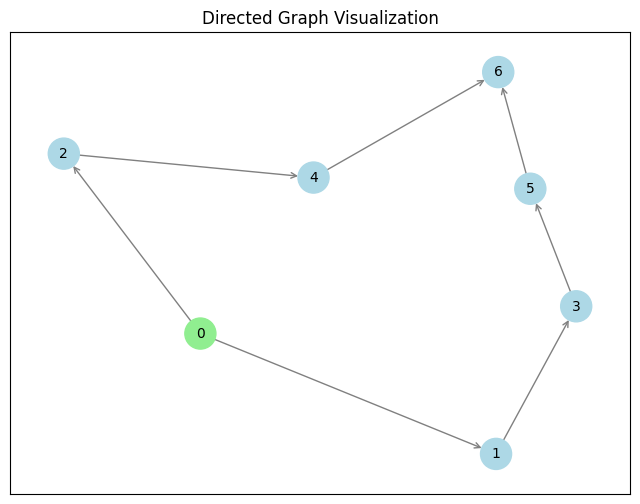

In [ ]:
# Create the directed graph
G = nx.DiGraph()
G.add_nodes_from(range(n))
G.add_edges_from(edges)

# Find source nodes
source_nodes = [node for node in G.nodes if G.in_degree(node) == 0]

# Define node colors
node_colors = ['lightgreen' if node in source_nodes else 'lightblue' for node in G.nodes]

# Visualization
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, k=0.3)  # Adjust k for node spacing
nx.draw_networkx(G, pos, with_labels=True, node_size=500,
                 node_color=node_colors, font_size=10,
                 arrowstyle='->', arrowsize=10,
                 edge_color='gray')
plt.title("Directed Graph Visualization")
plt.show()

## Solution Code

In [ ]:
solution_prompt = '''
Now I want to begin developing a solution the problem.
As a helpful coding assistant, explain the conceptual approaches.
Include an analysis of complexity and runtime for each approach.
Do not provide code yet, only the conceptual steps and evaluation.
'''

solution_response = chat.send_message(solution_prompt)
print_md(solution_response.text)


## Conceptual Approaches to Finding Minimum Vertices

Here are two conceptual approaches to solve the "Minimum Number of Vertices to Reach All Nodes" problem:

**1. Depth-First Search (DFS) Based Approach:**

* **Concept:**
    1. **Identify Source Nodes:** Start by finding all the source nodes in the graph (nodes with no incoming edges). These are definitely part of the solution set.
    2. **DFS Traversal:** Perform a depth-first search starting from each source node. Mark all reachable nodes during the traversal.
    3. **Minimize Sources:** If a source node can reach all nodes already covered by other source nodes, it can be removed from the solution set.

* **Complexity Analysis:**
    - **Time Complexity:** O(V + E) where V is the number of vertices (nodes) and E is the number of edges in the graph.  DFS traversal takes linear time in the size of the graph.
    - **Space Complexity:** O(V) - to store the graph and for the recursion stack during DFS.

**2.  Direct Source Node Identification:**

* **Concept:**
    - **In-Degree Analysis:**  Directly analyze the in-degree of each node in the graph. 
    - **Source Nodes:** Nodes with an in-degree of 0 are the source nodes, as they have no incoming edges. 

* **Complexity Analysis:**
    - **Time Complexity:** O(V + E) - Iterating through the edges to calculate in-degrees takes linear time in the size of the graph.
    - **Space Complexity:** O(V) - To store the graph and in-degree information for each node.

**Evaluation:**

Both approaches have the same time complexity, but the **direct source node identification** approach is generally considered more efficient and conceptually simpler. It directly leverages the defining property of source nodes (in-degree = 0) without the need for extensive graph traversal like DFS. 

For this specific LeetCode problem, where the input is a DAG, the direct source node identification method is the more straightforward and preferred solution. 


In [ ]:
solution_prompt = '''
Let's walk through solving this problem by using source
node identification. Walk me through the
implementation steps using Python. I want to make sure I
understand the code implementation for each step.
Use the variables specified in the Leetcode problem itself.
'''

solution_response = chat.send_message(solution_prompt)
print_md(solution_response.text)

## Python Implementation: Source Node Identification

Here's a step-by-step implementation using source node identification:

```python
def findSmallestSetOfVertices(n: int, edges: list[list[int]]) -> list[int]:
    """
    Finds the minimum set of vertices to reach all nodes in a DAG.

    Args:
        n: The number of nodes in the graph (labeled from 0 to n - 1).
        edges: A list of edges, where each edge is a list [source, destination].

    Returns:
        A list of vertices representing the minimum set.
    """

    # 1. Initialize In-Degree Array
    in_degree = [0] * n 

    # 2. Calculate In-Degrees
    for source, destination in edges:
        in_degree[destination] += 1

    # 3. Identify Source Nodes 
    source_nodes = []
    for node in range(n):
        if in_degree[node] == 0:
            source_nodes.append(node)

    # 4. Return Source Nodes
    return source_nodes 
```

**Explanation:**

1. **Initialize In-Degree Array:** We create a list `in_degree` of size `n` filled with zeros. This array will store the in-degree (number of incoming edges) for each node.

2. **Calculate In-Degrees:** We iterate through the `edges` list. For each edge `[source, destination]`, we increment the in-degree count of the `destination` node.

3. **Identify Source Nodes:** We traverse the `in_degree` array. If `in_degree[node]` is 0, it means that node has no incoming edges, making it a source node. We append these source nodes to the `source_nodes` list.

4. **Return Source Nodes:** Finally, we return the `source_nodes` list, which contains the minimum set of vertices required to reach all other nodes in the DAG.


In [ ]:
# import typing for type hints
from typing import List

class Solution:
    def findSmallestSetOfVertices(self, n: int, edges: list[list[int]]) -> list[int]:
        """
        Finds the minimum set of vertices to reach all nodes in a DAG.

        Args:
            n: The number of nodes in the graph (labeled from 0 to n - 1).
            edges: A list of edges, where each edge is a list [source, destination].

        Returns:
            A list of vertices representing the minimum set.
        """

        # 1. Initialize In-Degree Array
        in_degree = [0] * n

        # 2. Calculate In-Degrees
        for source, destination in edges:
            in_degree[destination] += 1

        # 3. Identify Source Nodes
        source_nodes = []
        for node in range(n):
            if in_degree[node] == 0:
                source_nodes.append(node)

        # 4. Return Source Nodes
        return source_nodes



## Test Solution on Initial Data

In [ ]:
# instantiate solution
sol = Solution()

# run function
answer = sol.findSmallestSetOfVertices(n=n, edges=edges)

# confirm result
print('Correct answer:', solution)
print('Function response:', answer)
assert solution == answer

Correct answer: [0]
Function response: [0]


## Conclusion
In this notebook we demonstrated how to use Google Gemini as a learning assistant for graph theory and LeetCode. We went beyond just "grinding LeetCode" to understand the graph theory concepts behind the problem. From there, we evaluated approaches to solve the solution and created one that takes the most straightforward approach.

While this is just a start, there is more we can do to use LLMs as a learning assistant (maybe even function calling to apply these concepts to a graph). More on that with later notebooks.